In [77]:
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [78]:
#Import the data
house_data = pd.read_csv("C:/Users/Nilam/PycharmProjects/Programming Practice/Machine Learning Models/Datasets/house-prices-advanced-regression-techniques/train.csv")
house_test_data = pd.read_csv("C:/Users/Nilam/PycharmProjects/Programming Practice/Machine Learning Models/Datasets/house-prices-advanced-regression-techniques/test.csv")

In [79]:
# check first few rows
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [80]:
#check data information
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [81]:
#Top 10 columns with missing values
house_data.apply(lambda x:sum(x.isnull()/len(x)*100)).sort_values(ascending=False)[0:20]

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageCond       5.547945
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
Utilities        0.000000
dtype: float64

In [82]:
total_house_data = pd.concat([house_data,house_test_data])
total_house_data['SalePrice']

C:\Users\Nilam\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1454         NaN
1455         NaN
1456         NaN
1457         NaN
1458         NaN
Name: SalePrice, Length: 2919, dtype: float64

In [83]:
#Top 10 columns with missing values
total_house_data.apply(lambda x:sum(x.isnull()/len(x)*100)).sort_values(ascending=False)[0:36]

PoolQC          99.657417
MiscFeature     96.402878
Alley           93.216855
Fence           80.438506
SalePrice       49.982871
FireplaceQu     48.646797
LotFrontage     16.649538
GarageFinish     5.447071
GarageCond       5.447071
GarageQual       5.447071
GarageYrBlt      5.447071
GarageType       5.378554
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtQual         2.774923
BsmtFinType2     2.740665
BsmtFinType1     2.706406
MasVnrType       0.822199
MasVnrArea       0.787941
MSZoning         0.137033
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
Utilities        0.068517
Functional       0.068517
Electrical       0.034258
Exterior2nd      0.034258
KitchenQual      0.034258
Exterior1st      0.034258
GarageCars       0.034258
TotalBsmtSF      0.034258
GarageArea       0.034258
BsmtUnfSF        0.034258
BsmtFinSF2       0.034258
BsmtFinSF1       0.034258
SaleType         0.034258
Condition2       0.000000
dtype: float64

In [84]:
total_house_data['Utilities'].isnull().value_counts()

False    2917
True        2
Name: Utilities, dtype: int64

In [85]:
#Handle missing values
total_house_data['Alley'] = total_house_data['Alley'].fillna('No_alley')
total_house_data['BsmtQual'] = total_house_data['BsmtQual'].fillna('No_basement')
total_house_data['BsmtCond'] = total_house_data['BsmtCond'].fillna('No_basement')
total_house_data['BsmtExposure'] = total_house_data['BsmtExposure'].fillna('No_basement')
total_house_data['BsmtFinType1'] = total_house_data['BsmtFinType1'].fillna('No_basement')
total_house_data['BsmtFinType2'] = total_house_data['BsmtFinType2'].fillna('No_basement')
total_house_data['FireplaceQu'] = total_house_data['FireplaceQu'].fillna('No_fireplace')
total_house_data['GarageType'] = total_house_data['GarageType'].fillna('No_garage')
total_house_data['GarageFinish'] = total_house_data['GarageFinish'].fillna('No_garage')
total_house_data['GarageQual'] = total_house_data['GarageQual'].fillna('No_garage')
total_house_data['GarageCond'] = total_house_data['GarageCond'].fillna('No_garage')
total_house_data['PoolQC'] = total_house_data['PoolQC'].fillna('No_pool')
total_house_data['Fence'] = total_house_data['Fence'].fillna('No_fence')
total_house_data['MiscFeature'] = total_house_data['MiscFeature'].fillna('No_misc')

total_house_data['LotFrontage'] = total_house_data['LotFrontage'].fillna(total_house_data['LotFrontage'].median())
total_house_data['MasVnrArea'] = total_house_data['MasVnrArea'].fillna(total_house_data['MasVnrArea'].median())
total_house_data['BsmtFullBath'] = total_house_data['BsmtFullBath'].fillna(total_house_data['BsmtFullBath'].median())
total_house_data['BsmtFinSF1'] = total_house_data['BsmtFinSF1'].fillna(total_house_data['BsmtFinSF1'].median())
total_house_data['TotalBsmtSF'] = total_house_data['TotalBsmtSF'].fillna(total_house_data['TotalBsmtSF'].median())
total_house_data['BsmtUnfSF'] = total_house_data['BsmtUnfSF'].fillna(total_house_data['BsmtUnfSF'].median())
total_house_data['GarageCars'] = total_house_data['GarageCars'].fillna(total_house_data['GarageCars'].median())
total_house_data['GarageArea'] = total_house_data['GarageArea'].fillna(total_house_data['GarageArea'].median())
total_house_data['BsmtFinSF2'] = total_house_data['BsmtFinSF2'].fillna(total_house_data['BsmtFinSF2'].median())
total_house_data['BsmtHalfBath'] = total_house_data['BsmtHalfBath'].fillna(total_house_data['BsmtHalfBath'].median())

In [86]:
#get Categorical variable list
cat_features = list(total_house_data.select_dtypes(include = 'object').columns)

for col in cat_features:
    total_house_data[col].fillna(total_house_data[col].mode()[0], inplace=True)

In [87]:
total_house_data.apply(lambda x:sum(x.isnull()/len(x)*100)).sort_values(ascending=False)[0:36]

SalePrice        49.982871
GarageYrBlt       5.447071
FullBath          0.000000
ExterCond         0.000000
ExterQual         0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
Fence             0.000000
FireplaceQu       0.000000
Fireplaces        0.000000
Foundation        0.000000
YrSold            0.000000
Electrical        0.000000
Functional        0.000000
GarageArea        0.000000
GarageCars        0.000000
GarageCond        0.000000
GarageFinish      0.000000
GarageQual        0.000000
GarageType        0.000000
EnclosedPorch     0.000000
Condition2        0.000000
HalfBath          0.000000
BsmtFinSF1        0.000000
2ndFlrSF          0.000000
3SsnPorch         0.000000
Alley             0.000000
BedroomAbvGr      0.000000
BldgType          0.000000
BsmtCond          0.000000
BsmtExposure      0.000000
BsmtFinSF2        0.000000
Condition1        0.000000
BsmtFinType1      0.000000
BsmtFinType2      0.000000
BsmtFullBath      0.000000
dtype: float64

In [88]:
total_house_data['sold_years_built'] = total_house_data['YrSold'] - total_house_data['YearBuilt']
total_house_data['remodel_years'] = total_house_data['YearRemodAdd'] - total_house_data['YearBuilt']
total_house_data.drop(['YrSold','YearBuilt','YearRemodAdd','MoSold','GarageYrBlt'], axis=1, inplace=True)

In [89]:
from collections import defaultdict
d = defaultdict(LabelEncoder)

encoded_house_data = pd.DataFrame()
#encode the categorical varables
encoded_house_data[cat_features] = total_house_data[cat_features].apply(lambda x: d[x.name].fit_transform(x))

continuous_features = list(set(total_house_data.columns) - set(cat_features))
#combine caegorical and cntinuous features together
encoded_house_data = pd.concat([encoded_house_data,total_house_data[continuous_features]], axis = 1)
encoded_house_data['SalePrice'] = np.log1p(encoded_house_data['SalePrice'])

In [90]:
#split data into training and testing based on salesprice
test_data = encoded_house_data[encoded_house_data.SalePrice.isnull()]
train_data = encoded_house_data[encoded_house_data.SalePrice.notnull()]

In [91]:
#set Id as index in both datasets
train_data.set_index('Id', inplace=True)
test_data.set_index('Id', inplace=True)

In [92]:
#get the independent variables
features = train_data.columns[train_data.columns != 'SalePrice']

In [93]:
#Define param grids
rf = RandomForestRegressor()
param_grid = {
    'n_estimators':[10,30,50,100,150,200,250,300,400,500],
    'max_features':['auto','sqrt']
}

grid_model = GridSearchCV(rf, param_grid = param_grid, cv=5)
model = grid_model.fit(train_data[features], train_data['SalePrice'])

In [94]:
pred = model.predict(test_data[features])
output = pd.DataFrame({'Id':np.array(test_data.index), 'SalePrice':np.expm1(pred)})
output.to_csv("House_Price_Data.csv",index=False)

#### Approach 2

In [95]:
from xgboost import XGBRegressor,plot_importance
xgb = XGBRegressor()

In [96]:
param_grid = {
    'n_estimators': [50, 100, 150, 200, 300, 400,500],
    'max_depth': [2,4,6,8]
}

In [97]:
grid_model2 = GridSearchCV(xgb, param_grid = param_grid, cv=10)
model2 = grid_model2.fit(train_data[features], train_data['SalePrice'])

In [98]:
pred2 = model2.predict(test_data[features])
output2 = pd.DataFrame({'Id':np.array(test_data.index), 'SalePrice':np.expm1(pred2)})
output2.to_csv("House_Price_Data_XGB.csv",index=False)

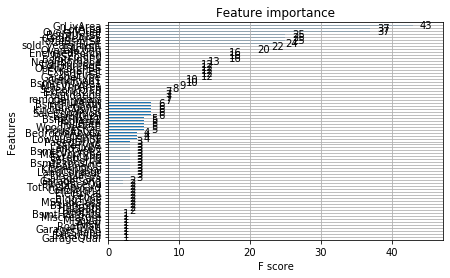

In [99]:
plot_importance(model2.best_estimator_)

#### Approach 3 using one hot encoder

In [100]:
onehot_encode_house_data = pd.get_dummies(total_house_data)
onehot_encode_house_data['SalePrice'] = np.log1p(onehot_encode_house_data['SalePrice'])

In [101]:
onehot_encode_house_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,0,0,0,0,0,1,0,1,1,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,0,0,0,0,0,1,0,1,1,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,0,0,0,0,0,1,0,1,1,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,0,0,0,0,0,1,0,1,1,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,0,0,0,0,0,1,0,1,1,0


In [102]:
test_data1 = onehot_encode_house_data[onehot_encode_house_data.SalePrice.isnull()]
train_data1 = onehot_encode_house_data[onehot_encode_house_data.SalePrice.notnull()]

train_data1.set_index('Id', inplace=True)
test_data1.set_index('Id', inplace=True)

In [103]:
new_features = train_data1.columns[train_data1.columns != 'SalePrice']
new_features

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch',
       ...
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_Oth', 'SaleType_WD', 'Street_Grvl', 'Street_Pave',
       'Utilities_AllPub', 'Utilities_NoSeWa'],
      dtype='object', length=299)

In [104]:
model3 = grid_model2.fit(train_data1[new_features], train_data1['SalePrice'])

In [105]:
pred3 = model3.predict(test_data1[new_features])
output3 = pd.DataFrame({'Id':np.array(test_data1.index), 'SalePrice':np.expm1(pred3)})
output3.to_csv("House_Price_Data_XGB_v2.csv",index=False)

#### Approach4 : LightGBM

In [106]:
from lightgbm import LGBMRegressor
import lightgbm
lgbm = LGBMRegressor()

In [107]:
param_grid = {
    'num_estimators':[50, 100, 150, 200, 250, 300, 350, 400],
    'max_depth': [5, 7, 9, 11],
    'learning_rate': [0.001,0.01, 0.05, 0.1]
}

grid_model4 = GridSearchCV(lgbm, param_grid=param_grid, cv =5)

In [108]:
model4 = grid_model4.fit(train_data[features],
                         train_data['SalePrice'])

In [109]:
model4.best_estimator_

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=9,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_estimators=50, num_leaves=31,
              objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)

In [110]:
pred4 = model4.predict(test_data[features])
output3 = pd.DataFrame({'Id':np.array(test_data.index), 'SalePrice':np.expm1(pred3)})
output3.to_csv("House_Price_Data_lgbm.csv",index=False)

#### Approach5: Reguralization

In [111]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
ridge = Ridge()
lasso = Lasso()
elastic = ElasticNet()

In [112]:
reg_param = {
    'alpha': [0.0001,0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
}

grid_model5 = GridSearchCV(ridge, param_grid=reg_param, cv =5)
grid_model6 = GridSearchCV(lasso, param_grid=reg_param, cv =5)
grid_model7 = GridSearchCV(elastic, param_grid=reg_param, cv =5)

In [113]:
model5 = grid_model5.fit(train_data[features], train_data['SalePrice'])
model6 = grid_model6.fit(train_data[features], train_data['SalePrice'])
model7 = grid_model7.fit(train_data[features], train_data['SalePrice'])

C:\Users\Nilam\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.784847571399562, tolerance: 0.018912592760396085
  positive)
C:\Users\Nilam\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.292755110079934, tolerance: 0.018002191385488822
  positive)
C:\Users\Nilam\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.34808694357328, tolerance: 0.018373605848561597
  positive)
C:\Users\Nilam\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duali

C:\Users\Nilam\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.485447318832469, tolerance: 0.018912592760396085
  positive)
C:\Users\Nilam\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.860222904471307, tolerance: 0.018002191385488822
  positive)
C:\Users\Nilam\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.09098301415748, tolerance: 0.018373605848561597
  positive)
C:\Users\Nilam\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dua

In [114]:
pred5 = model5.predict(test_data[features])
output5 = pd.DataFrame({'Id':np.array(test_data.index), 'SalePrice':np.expm1(pred5)})
output5.to_csv("House_Price_Data_ridge.csv",index=False)

pred6 = model6.predict(test_data[features])
output6 = pd.DataFrame({'Id':np.array(test_data.index), 'SalePrice':np.expm1(pred6)})
output6.to_csv("House_Price_Data_lasso.csv",index=False)

pred7 = model7.predict(test_data[features])
output7 = pd.DataFrame({'Id':np.array(test_data.index), 'SalePrice':np.expm1(pred7)})
output7.to_csv("House_Price_Data_elastic.csv",index=False)

#### Stacking

In [115]:
pred8 = pred4*0.55 + pred3*0.450 
output8 = pd.DataFrame({'Id':np.array(test_data.index), 'SalePrice':np.expm1(pred8)})
output8.to_csv("House_Price_Data_stacked_v2.csv",index=False)

In [116]:
pred9 = pred3*0.1 + pred4*0.3 + pred5*0.3 + pred7*0.3
output9 = pd.DataFrame({'Id':np.array(test_data.index), 'SalePrice':np.expm1(pred9)})
output9.to_csv("House_Price_Data_stacked_v.csv",index=False)

In [120]:
pred9 = pred3*0.3+pred4*0.10 + pred5*0.3 + pred7*0.3
output9 = pd.DataFrame({'Id':np.array(test_data.index), 'SalePrice':np.expm1(pred9)})
output9.to_csv("House_Price_Data_stacked_v.csv",index=False)